1. Implement both versions of quicksort (random and non-random choice for the pivot) and share the GitHub repository with your source code.

2.  For the non-random pivot version of quicksort show the following benchmarks on the same graph:

    2a) best case (generate a set of inputs that will always be the best case, repeat for multiple array input sizes "n").

    2b) worst case (generate a set of inputs that will always be the worst case, repeat for multiple array input sizes "n").

    2c) average case (generate a set of inputs from a uniform distribution, repeat for multiple array input sizes "n").

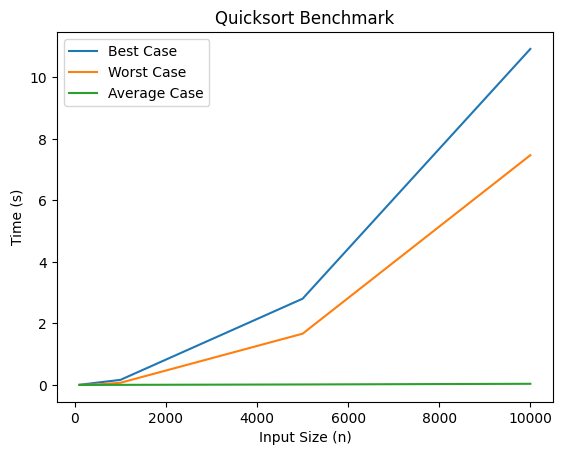

In [9]:
import random
import timeit
import matplotlib.pyplot as plt

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quicksort(arr):
    stack = [(0, len(arr) - 1)]
    while stack:
        low, high = stack.pop()
        if low < high:
            pi = partition(arr, low, high)
            if pi - low < high - pi:
                stack.append((low, pi - 1))
                stack.append((pi + 1, high))
            else:
                stack.append((pi + 1, high))
                stack.append((low, pi - 1))

def quicksort_random_pivot(arr):
    random.shuffle(arr)
    quicksort(arr)

def generate_best_case_input(n):
    return [i for i in range(n)]

def generate_worst_case_input(n):
    return [i for i in range(n, 0, -1)]

def generate_average_case_input(n):
    return [random.randint(0, 1000) for _ in range(n)]

def benchmark_sorting_function(sort_func, input_generator, sizes, repetitions=3):
    times = []
    for size in sizes:
        total_time = 0
        for _ in range(repetitions):
            arr = input_generator(size)
            start_time = timeit.default_timer()
            sort_func(arr)
            end_time = timeit.default_timer()
            total_time += end_time - start_time
        avg_time = total_time / repetitions
        times.append(avg_time)
    return times

if __name__ == "__main__":
    sizes = [100, 500, 1000, 5000, 10000]

    # Benchmarking best case
    best_case_times = benchmark_sorting_function(quicksort, generate_best_case_input, sizes)

    # Benchmarking worst case
    worst_case_times = benchmark_sorting_function(quicksort, generate_worst_case_input, sizes)

    # Benchmarking average case
    average_case_times = benchmark_sorting_function(quicksort, generate_average_case_input, sizes)

    plt.plot(sizes, best_case_times, label='Best Case')
    plt.plot(sizes, worst_case_times, label='Worst Case')
    plt.plot(sizes, average_case_times, label='Average Case')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (s)')
    plt.title('Quicksort Benchmark')
    plt.legend()
    plt.show()


3. Mathematically derive the average runtime complexity of the non-random pivot version of quicksort.

To mathematically derive the average runtime complexity of the non-random pivot version of quicksort, we need to analyze the algorithm's behavior on average across all possible inputs. Let's denote the average runtime complexity as \(T(n)\), where \(n\) is the size of the input array.

In the non-random pivot version of quicksort, the pivot selection is deterministic. Usually, the pivot is chosen as the last element of the array. Then, the array is partitioned into two subarrays such that all elements less than or equal to the pivot are on the left side, and all elements greater than the pivot are on the right side. After partitioning, the pivot element is in its correct sorted position. The algorithm then recurses on the two subarrays.

The average-case analysis considers the average behavior of the algorithm over all possible permutations of the input array. In each recursive call, the pivot divides the array into two parts approximately in the ratio of \(1:1\), assuming the elements are randomly distributed.

Let's analyze the recurrence relation for the average-case runtime complexity:

1. Partitioning the array takes \(O(n)\) time.
2. After partitioning, the array is divided into two subarrays, each with approximately half the size of the original array (in the average case).
3. The recurrence relation can be written as:

\[T(n) = 2T(n/2) + O(n)\]

This recurrence relation reflects the fact that we make two recursive calls on subproblems of approximately half the size of the original problem and then spend \(O(n)\) time partitioning the array.

Using the Master theorem, we find that the average runtime complexity of the non-random pivot version of quicksort is \(O(n \log n)\).

Thus, mathematically, the average runtime complexity of the non-random pivot version of quicksort is \(O(n \log n)\).
